# Import knihoven a načtení dat

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("fotbal_prestupy_2000_2019.csv")

In [3]:
df.head()

,Jméno,Pozice,Věk,Původní tým,Původní liga,Nový tým,Nová Liga,Sezóna,Odhadovaná hodnota,Přestupová částka
0,Luís Figo,Right Winger,27,FC Barcelona,LaLiga,Real Madrid,LaLiga,2000-2001,NaN,60000000
1,Hernán Crespo,Centre-Forward,25,Parma,Serie A,Lazio,Serie A,2000-2001,NaN,56810000
2,Marc Overmars,Left Winger,27,Arsenal,Premier League,FC Barcelona,LaLiga,2000-2001,NaN,40000000
3,Gabriel Batistuta,Centre-Forward,31,Fiorentina,Serie A,AS Roma,Serie A,2000-2001,NaN,36150000
4,Nicolas Anelka,Centre-Forward,21,Real Madrid,LaLiga,Paris SG,Ligue 1,2000-2001,NaN,34500000


# Základní charakteristiky

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4700 entries, 0 to 4699
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Jméno               4700 non-null   object 
 1   Pozice              4700 non-null   object 
 2   Věk                 4700 non-null   int64  
 3   Původní tým         4700 non-null   object 
 4   Původní liga        4700 non-null   object 
 5   Nový tým            4700 non-null   object 
 6   Nová  Liga          4700 non-null   object 
 7   Sezóna              4700 non-null   object 
 8   Odhadovaná hodnota  3440 non-null   float64
 9   Přestupová částka   4700 non-null   int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 367.3+ KB


In [5]:
df.describe()

,Věk,Odhadovaná hodnota,Přestupová částka
count,4700.000000,3.440000e+03,4.700000e+03
mean,24.338723,8.622469e+06,9.447586e+06
std,3.230809,8.795181e+06,1.043772e+07
min,0.000000,5.000000e+04,8.250000e+05
25%,22.000000,3.500000e+06,4.000000e+06
50%,24.000000,6.000000e+06,6.500000e+06
75%,27.000000,1.000000e+07,1.082000e+07
max,35.000000,1.200000e+08,2.220000e+08


# Příjmy & výdaje lig a klubů

In [6]:
# Top 4 ligy s největšími příjmy
df["Přestupová částka"] = df["Přestupová částka"] / 1e6 # úprava přestupové částky na miliony
top4_liga_prijmy = df.groupby(['Původní liga'])['Přestupová částka'].sum()
top4_liga_prijmy = (top4_liga_prijmy.sort_values(ascending=False).head(4))
top4_liga_prijmy

Původní liga
Premier League    7248.51
Serie A           7083.98
LaLiga            5533.86
Ligue 1           4396.89
Name: Přestupová částka, dtype: float64

In [7]:
# Top 4 ligy s největšími výdaji
top4_liga_vydaje = df.groupby(['Nová  Liga'])['Přestupová částka'].sum()
top4_liga_vydaje = top4_liga_vydaje.sort_values(ascending=False).head(4)
top4_liga_vydaje

Nová  Liga
Premier League    14695.40
Serie A            7535.22
LaLiga             6680.36
Ligue 1            3682.72
Name: Přestupová částka, dtype: float64

In [8]:
# Top 4 kluby s největšími přjmy
top4_klub_prijmy = df.groupby(['Původní tým'])['Přestupová částka'].sum()
top4_klub_prijmy = (top4_klub_prijmy.sort_values(ascending=False).head(4))
top4_klub_prijmy

Původní tým
Monaco         948.17
FC Porto       917.55
Real Madrid    891.40
Chelsea        839.53
Name: Přestupová částka, dtype: float64

In [9]:
# Top 4 kluby s největšími výdaji
top4_klub_vydaje = df.groupby(['Nový tým'])['Přestupová částka'].sum()
top4_klub_vydaje = (top4_klub_vydaje.sort_values(ascending=False).head(4))
top4_klub_vydaje

Nový tým
Chelsea         1820.65
Man City        1800.52
Real Madrid     1680.65
FC Barcelona    1673.04
Name: Přestupová částka, dtype: float64

# Nejziskovější ligy a kluby

In [10]:
# Výpočet zisku lig
prijmy_ligy = df.groupby("Původní liga")["Přestupová částka"].sum()
vydaje_ligy = df.groupby("Nová  Liga")["Přestupová částka"].sum()
zisk_ligy = (prijmy_ligy - vydaje_ligy).sort_values(ascending=False).head(10)

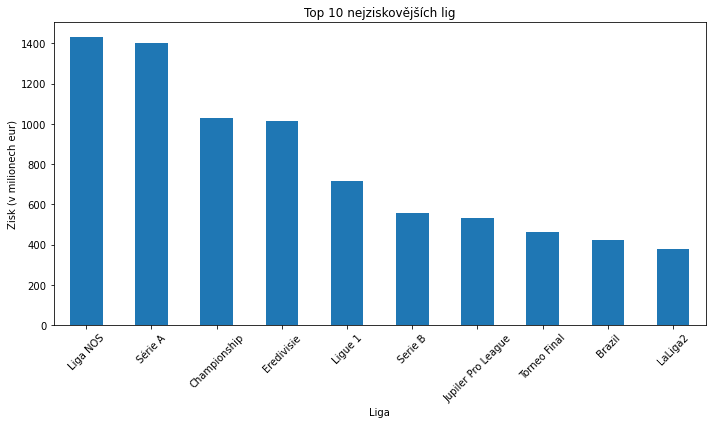

In [11]:
# Vizualizace zisku pro ligy
zisk_ligy.plot(kind='bar', figsize=(10, 6), title='Top 10 nejziskovějších lig')
plt.xlabel('Liga')
plt.ylabel('Zisk (v milionech eur)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [12]:
# Výpočet zisku klubů
prijmy_klubu = df.groupby("Původní tým")["Přestupová částka"].sum()
vydaje_klubu = df.groupby("Nový tým")["Přestupová částka"].sum()
zisk_klubu = (prijmy_klubu - vydaje_klubu).sort_values(ascending=False).head(10)

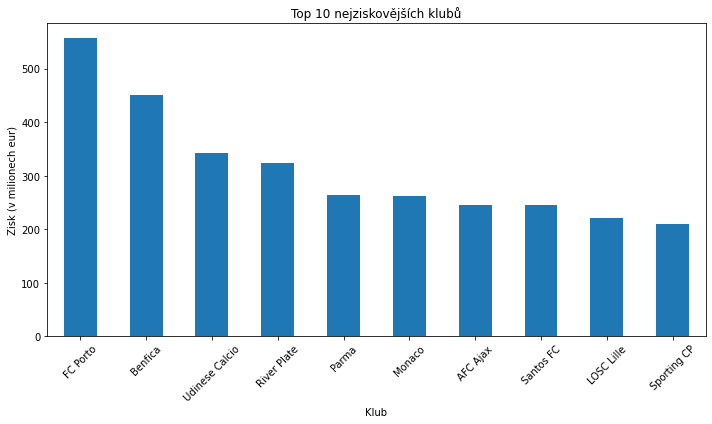

In [13]:
# Vizualizace zisku pro kluby
zisk_klubu.plot(kind='bar', figsize=(10, 6), title='Top 10 nejziskovějších klubů')
plt.xlabel('Klub')
plt.ylabel('Zisk (v milionech eur)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Nejztrátovější ligy a kluby

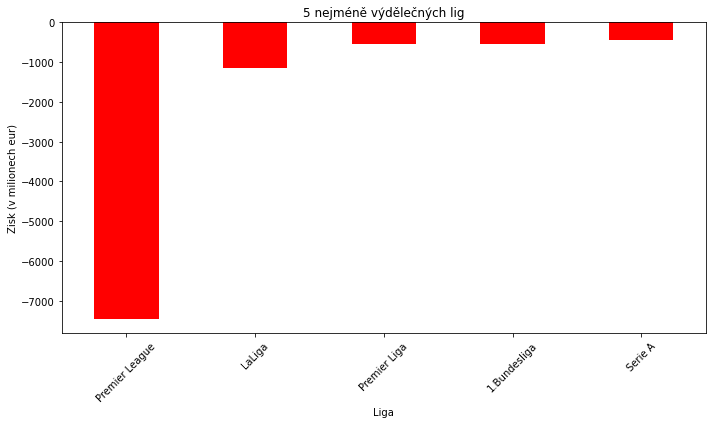

In [14]:
zisk_ligy = (prijmy_ligy - vydaje_ligy).sort_values(ascending=True).head(5)  # 5 nejztrátovějších lig
# Vizualizace pro ligy
zisk_ligy.plot(kind='bar', figsize=(10, 6), title='5 nejméně výdělečných lig', color='red')
plt.xlabel('Liga')
plt.ylabel('Zisk (v milionech eur)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

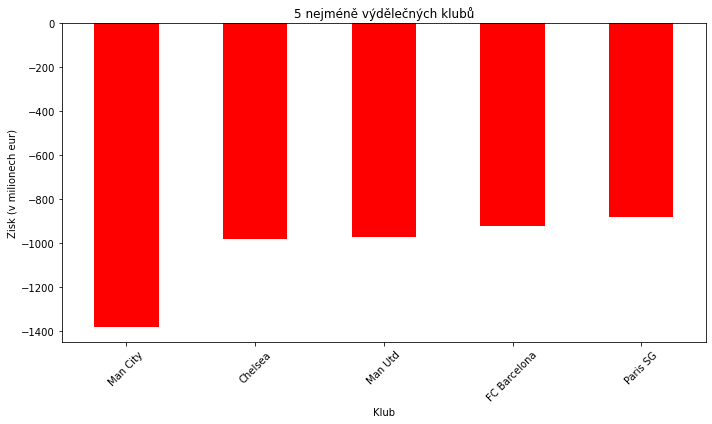

In [15]:
zisk_klubu = (prijmy_klubu - vydaje_klubu).sort_values(ascending=True).head(5)  # 5 nejztrátovějších klubů
# Vizualizace pro kluby
zisk_klubu.plot(kind='bar', figsize=(10, 6), title='5 nejméně výdělečných klubů', color='red')
plt.xlabel('Klub')
plt.ylabel('Zisk (v milionech eur)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Prestiž klubů z hlediska počtu příchodů hráčů

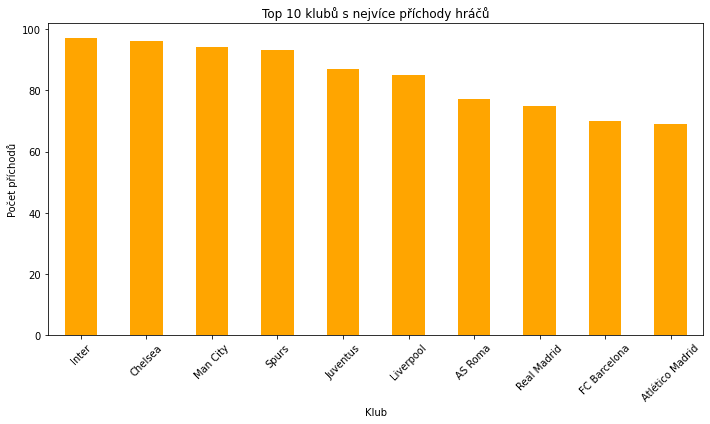

In [16]:
# Počítání, kam hráči nejčastěji odcházeli
nejcastejsi_kluby = df['Nový tým'].value_counts().head(10)

# Vizualizace top 10 klubů
nejcastejsi_kluby.plot(kind='bar', figsize=(10, 6), color='orange', title='Top 10 klubů s nejvíce příchody hráčů')
plt.xlabel('Klub')
plt.ylabel('Počet příchodů')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Rozdělení hráčů podle přestupové částky a věku

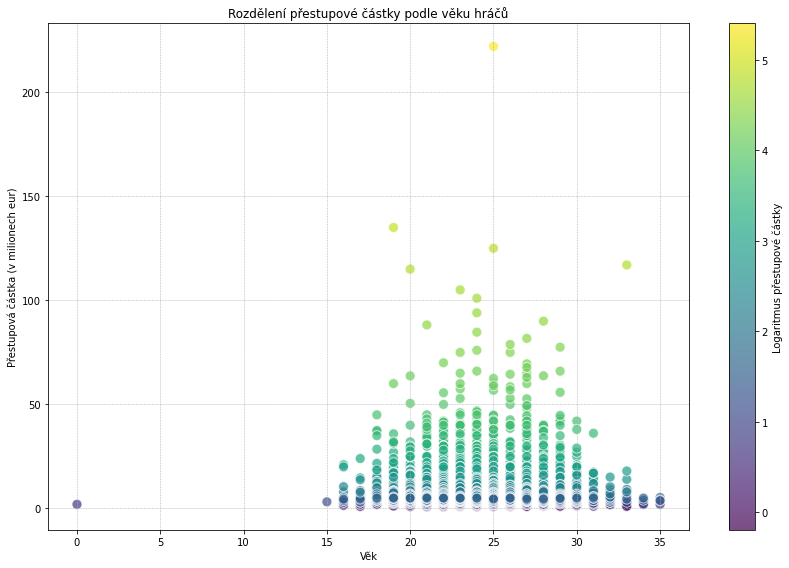

In [17]:
plt.figure(figsize=(12, 8))
colors = np.log(df["Přestupová částka"])  # Použití logaritmu přestupové částky pro barevné kódování
scatter = plt.scatter(df["Věk"], df["Přestupová částka"], c=colors, cmap='viridis', alpha=0.7, edgecolors='w', s=100)

# Přidání colorbaru pro zobrazení logaritmu přestupové částky
plt.colorbar(scatter, label='Logaritmus přestupové částky')

plt.title('Rozdělení přestupové částky podle věku hráčů')
plt.xlabel('Věk')
plt.ylabel('Přestupová částka (v milionech eur)')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


In [18]:
vekove_kategorie = [15, 20, 25, 30, 35]

# Vytvoříme nový sloupec 'Věková kategorie' podle rozsahu věkových kategorií
df['Věková kategorie'] = pd.cut(df['Věk'], bins=vekove_kategorie, right=False)

# Spočítáme průměrnou přestupovou částku pro každou věkovou kategorii
prumerna_castka_vekove_kategorie = df.groupby('Věková kategorie')['Přestupová částka'].mean().reset_index()

# Výsledek
prumerna_castka_vekove_kategorie

,Věková kategorie,Přestupová částka
0,"[15, 20)",9.026726
1,"[20, 25)",9.462433
2,"[25, 30)",9.790531
3,"[30, 35)",7.357820


# Nejdražší přestupy hráčů podle různých specifik

In [19]:
# Hráč s nejvyšší přestupovou částkou v datasetu
nejdrazsi_prestup = df.loc[df["Přestupová částka"].idxmax(), ["Jméno", "Pozice","Věk", "Přestupová částka", "Původní tým", "Nový tým", "Sezóna"]]
nejdrazsi_prestup


Jméno                      Neymar
Pozice                Left Winger
Věk                            25
Přestupová částka           222.0
Původní tým          FC Barcelona
Nový tým                 Paris SG
Sezóna                  2017-2018
Name: 4211, dtype: object

In [20]:
# Nejdražší přestup hráče ve věkové kategorii 15 až 20 let
nejdrazsi_prestup_15_20 = df[(df["Věk"] >= 15) & (df["Věk"] <= 20)].sort_values("Přestupová částka", ascending=False).head(1)[["Jméno", "Pozice", "Věk", "Přestupová částka", "Původní tým", "Nový tým", "Sezóna"]]
nejdrazsi_prestup_15_20


,Jméno,Pozice,Věk,Přestupová částka,Původní tým,Nový tým,Sezóna
4455,Kylian Mbappé,Right Winger,19,135.0,Monaco,Paris SG,2018-2019


In [21]:
# Nejdražší přestup hráče ve věkové kategorii 30 až 35 let
nejdrazsi_prestup_30_35 = df[(df["Věk"] >= 30) & (df["Věk"] <= 35)].sort_values("Přestupová částka", ascending=False).head(1)[["Jméno", "Věk", "Pozice", "Přestupová částka", "Původní tým", "Nový tým", "Sezóna"]]
nejdrazsi_prestup_30_35


,Jméno,Věk,Pozice,Přestupová částka,Původní tým,Nový tým,Sezóna
4456,Cristiano Ronaldo,33,Centre-Forward,117.0,Real Madrid,Juventus,2018-2019


# Průzkum přestupových částek dle pozice hráče

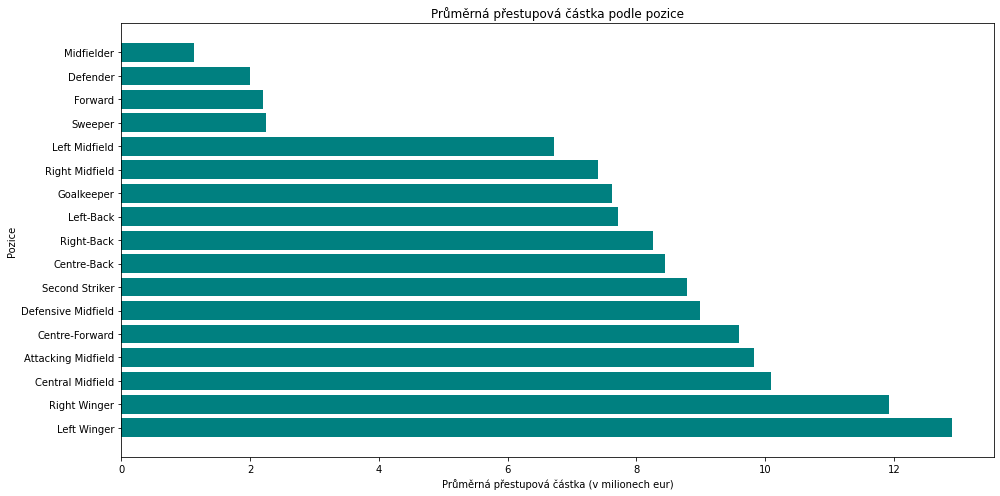

In [22]:
# Nejprve spočítáme průměrnou přestupovou částku podle pozice
prumerna_castka_pozice = df.groupby('Pozice')['Přestupová částka'].mean().sort_values(ascending=False).reset_index()

# Vytvoříme graf zobrazující závislost hodnoty přestupové částky na pozici hráče
plt.figure(figsize=(14, 7))
plt.barh(prumerna_castka_pozice['Pozice'], prumerna_castka_pozice['Přestupová částka'], color='teal')
plt.title('Průměrná přestupová částka podle pozice')
plt.xlabel('Průměrná přestupová částka (v milionech eur)')
plt.ylabel('Pozice')
plt.tight_layout()
plt.show()

In [23]:
# Nyní nalezneme nejdražší přestup pro každou pozici
nejdrazsi_prestup_pozice = df.loc[df.groupby('Pozice')['Přestupová částka'].idxmax()]

# Zobrazíme nejdražší přestupy podle pozice
nejdrazsi_prestup_pozice = nejdrazsi_prestup_pozice[['Pozice', 'Jméno', "Sezóna", 'Přestupová částka']].sort_values(by='Přestupová částka', ascending=False)
nejdrazsi_prestup_pozice

,Pozice,Jméno,Sezóna,Přestupová částka
4211,Left Winger,Neymar,2017-2018,222.00
4455,Right Winger,Kylian Mbappé,2018-2019,135.00
4212,Attacking Midfield,Philippe Coutinho,2017-2018,125.00
4456,Centre-Forward,Cristiano Ronaldo,2018-2019,117.00
3961,Central Midfield,Paul Pogba,2016-2017,105.00
4215,Centre-Back,Virgil van Dijk,2017-2018,78.80
4459,Goalkeeper,Alisson,2018-2019,62.50
4220,Left-Back,Benjamin Mendy,2017-2018,57.50
4462,Defensive Midfield,Jorginho,2018-2019,57.00
4222,Right-Back,Kyle Walker,2017-2018,52.70


# Nejdražší přestupy pro každou sezonu

In [24]:
# Najdeme nejdražší přestup v každé sezóně
nejdrazsi_prestup_sezona = df.loc[df.groupby('Sezóna')['Přestupová částka'].idxmax()]

# Vybereme pouze potřebné sloupce
nejdrazsi_prestupy_podle_sezony = nejdrazsi_prestup_sezona[['Sezóna', 'Jméno', 'Přestupová částka']].sort_values(by='Sezóna', ascending=True)
nejdrazsi_prestupy_podle_sezony


,Sezóna,Jméno,Přestupová částka
0,2000-2001,Luís Figo,60.00
248,2001-2002,Zinédine Zidane,77.50
498,2002-2003,Rio Ferdinand,46.00
742,2003-2004,David Beckham,37.50
984,2004-2005,Didier Drogba,38.50
1232,2005-2006,Michael Essien,38.00
1479,2006-2007,Andriy Shevchenko,43.30
1728,2007-2008,Fernando Torres,38.00
1976,2008-2009,Robinho,43.00
2226,2009-2010,Cristiano Ronaldo,94.00
